In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import AutoMinorLocator
from tdse_solver import *
from helper import *
a = 10
b = 2*np.pi / a
nkpts = 120
nbnds = 5
k0 = np.linspace(-0.5, 0.5, nkpts, endpoint=True)

deep_red = '#C44E52'
dark_red = '#8B0000'
deep_blue = '#4C72B0'
deep_green = '#55A868'

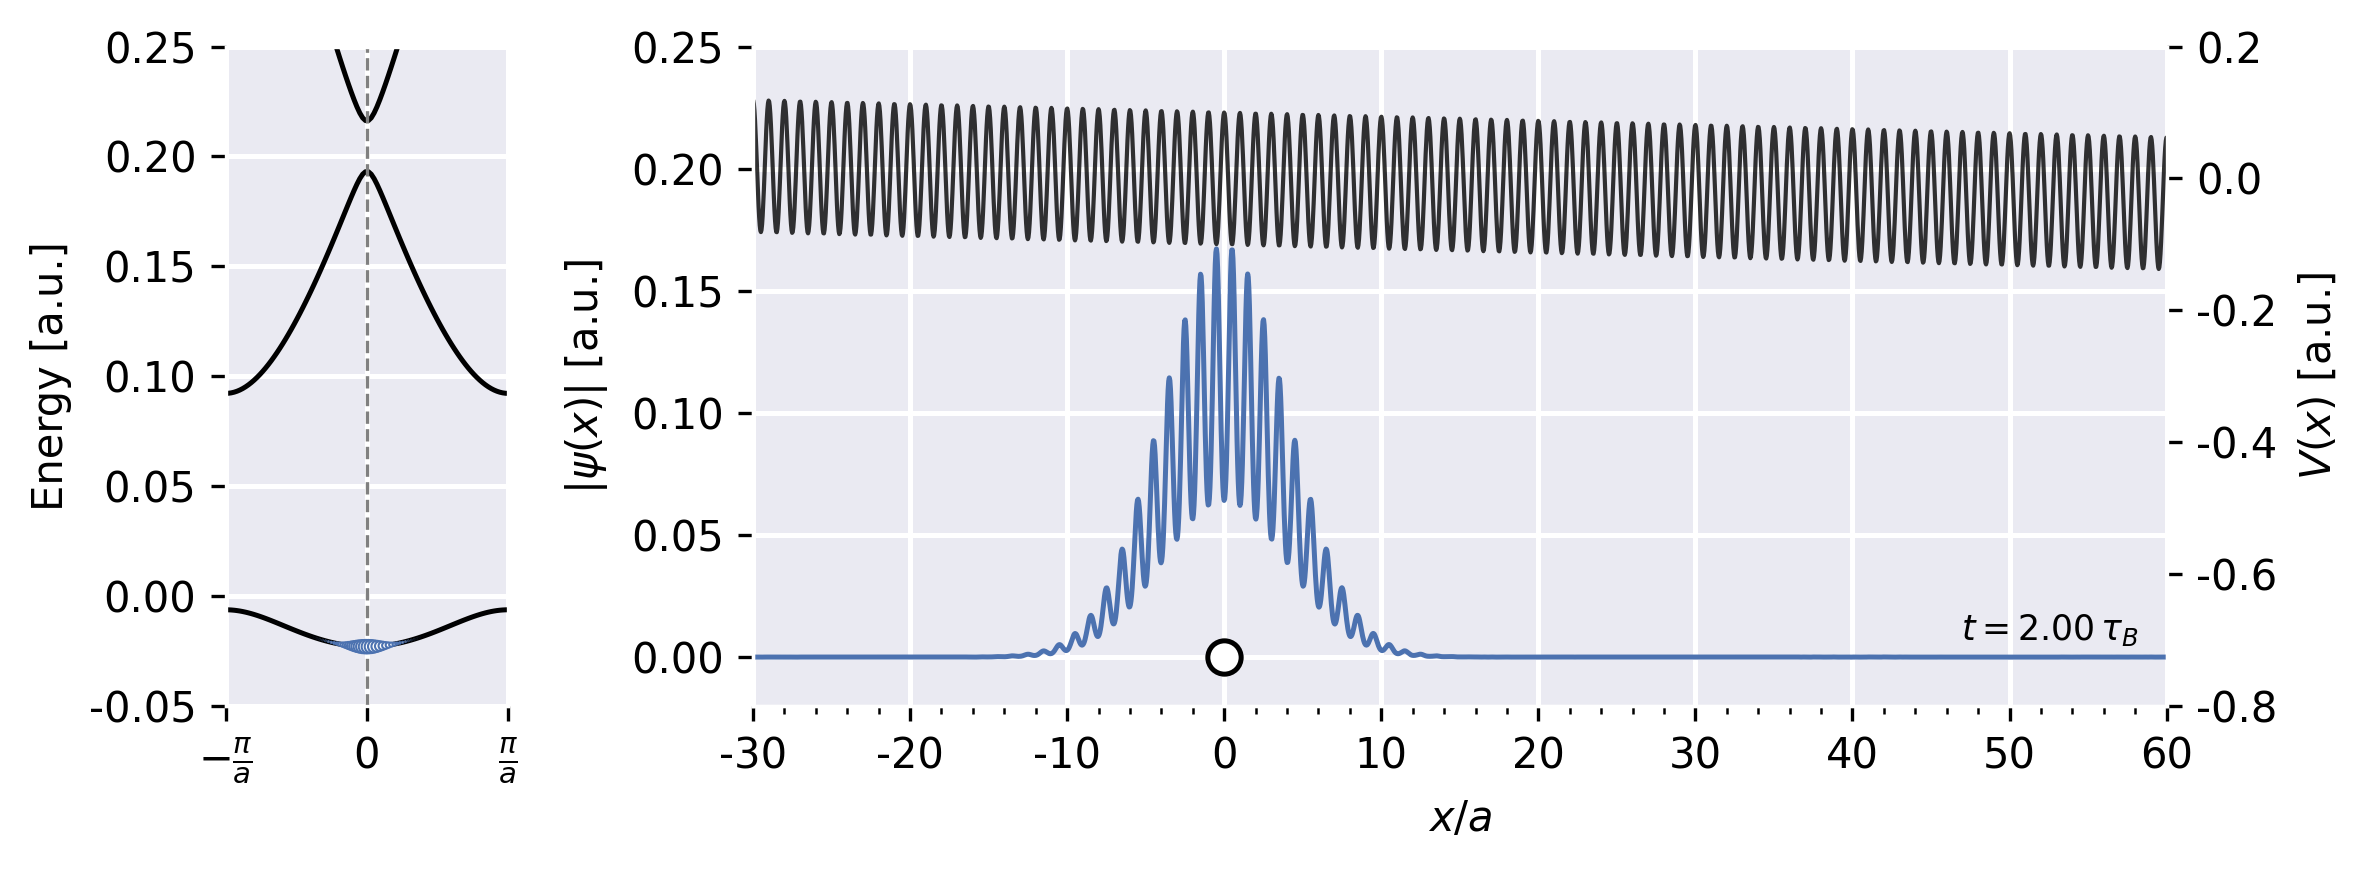

Animation saved to ../simulation/testtest.mp4


In [7]:
# 1. 파라미터 및 시스템 설정
a, v0 = 10, 0.05
b = 2 * np.pi / a
qE = 2 * np.pi / 1E5  # 예시 값 (필요에 따라 수정)
dt = 1
Tbloch = 2 * np.pi / (qE * a)
ngx, nbnds = 20, 5

# 2. 초기 상태 및 해밀토니안 구성
k0_center, sigma_k = 0, 0.04
kwp, fk = get_bloch_wavepacket_gaussian_envelop(k0_center, sigma_k=sigma_k, nk=100, Nsigma=10)

Nc, Nx = 150, 3999
L = Nc * a
x = np.linspace(-0.4*L, 0.6*L, Nx)
bloch_wp = construct_blochwp_cosx_pot(x, kwp, fk, a=a, v0=v0, nbnds=nbnds, ngx=ngx)

Vx = 2 * v0 * np.cos(b*x) - qE*x

# 3. 밴드 구조 및 기저 계산
k_1d_bz = np.linspace(-0.5, 0.5, 100)
Gx = np.arange(ngx, dtype=int)
Gx[ngx // 2 + 1:] -= ngx

Enk, phi_nk = [], []
for k in k_1d_bz:
    e, c = epsilon_nk_cosx_pot(k, a=a, v0=v0, ngx=ngx, nbnds=nbnds, Ngmax=1)
    Enk.append(e)
    # 바닥 상태(n0=0) 기저 함수 저장
    phi_nk.append(np.sum(c[0][:,None] * np.exp(1j*b*(Gx+k)[:,None] * x[None,:]), axis=0))

Enk = np.asarray(Enk)
phi_nk = np.asarray(phi_nk) # shape: (Nk, Nx)

# 4. 시간 발전 (Time Propagation) 실행
NSW = 2 * int(Tbloch / dt)
# 필요에 따라 SplitStepFourier 또는 CrankNicolson 사용
PSI0 = SplitStepFourier(bloch_wp, Vx, x, dt, NSW, False)

# 5. 결과 시각화 함수 호출 (한 줄로 끝!)
sim_params = {'a': a, 'dt': dt, 'Tbloch': Tbloch, 'n0': 0, 'nbnds': nbnds}

create_bloch_animation(
    PSI0, Enk, phi_nk, Vx, x, k_1d_bz, 
    params=sim_params, 
    filename='../simulation/testtest.mp4'
)

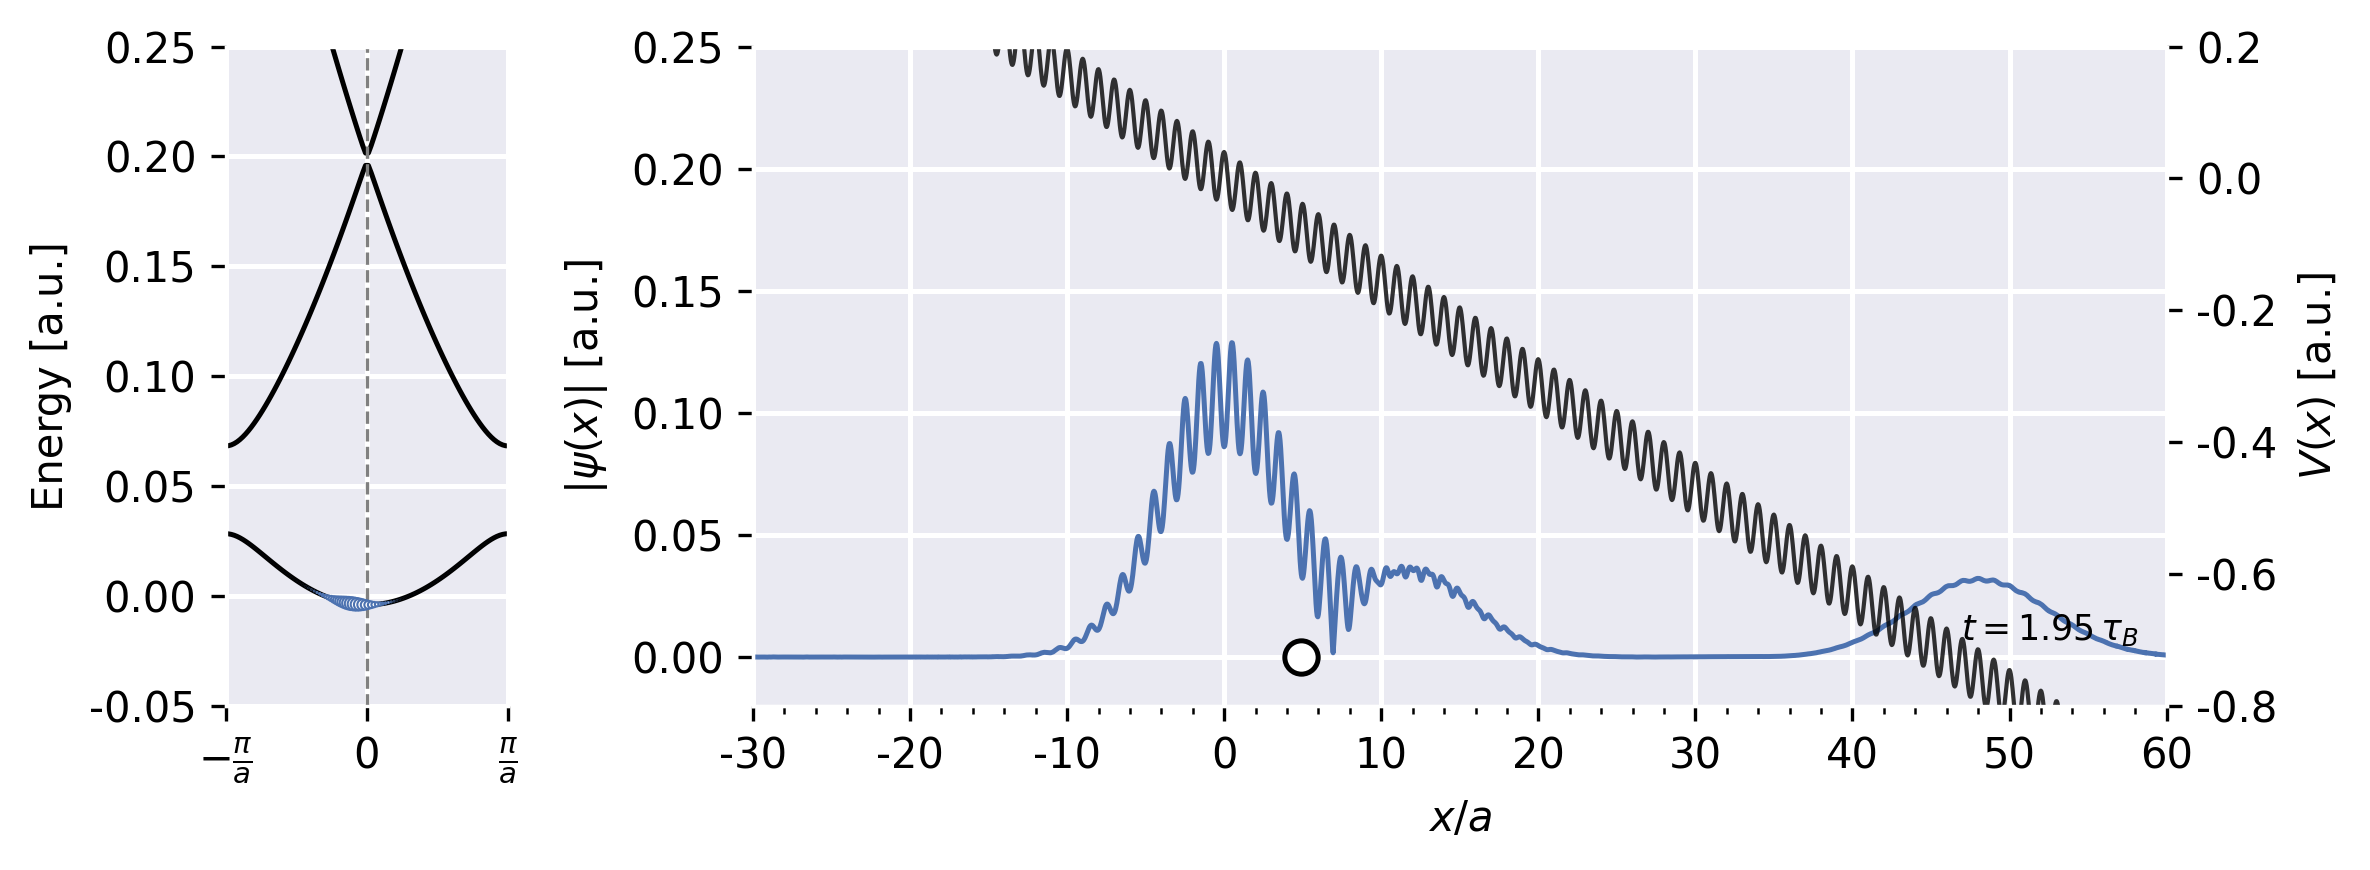

Animation saved to ../simulation/testtest_zener.mp4


In [8]:
# 1. 파라미터 및 시스템 설정
a, v0 = 10, 0.02
b = 2 * np.pi / a
qE = 2 * np.pi / 4000  # 예시 값 (필요에 따라 수정)
dt = 1
Tbloch = 2 * np.pi / (qE * a)
ngx, nbnds = 20, 5

# 2. 초기 상태 및 해밀토니안 구성
k0_center, sigma_k = 0, 0.04
kwp, fk = get_bloch_wavepacket_gaussian_envelop(k0_center, sigma_k=sigma_k, nk=100, Nsigma=10)

Nc, Nx = 150, 3999
L = Nc * a
x = np.linspace(-0.4*L, 0.6*L, Nx)
bloch_wp = construct_blochwp_cosx_pot(x, kwp, fk, a=a, v0=v0, nbnds=nbnds, ngx=ngx)

Vx = 2 * v0 * np.cos(b*x) - qE*x

# 3. 밴드 구조 및 기저 계산
k_1d_bz = np.linspace(-0.5, 0.5, 100)
Gx = np.arange(ngx, dtype=int)
Gx[ngx // 2 + 1:] -= ngx

Enk, phi_nk = [], []
for k in k_1d_bz:
    e, c = epsilon_nk_cosx_pot(k, a=a, v0=v0, ngx=ngx, nbnds=nbnds, Ngmax=1)
    Enk.append(e)
    # 바닥 상태(n0=0) 기저 함수 저장
    phi_nk.append(np.sum(c[0][:,None] * np.exp(1j*b*(Gx+k)[:,None] * x[None,:]), axis=0))

Enk = np.asarray(Enk)
phi_nk = np.asarray(phi_nk) # shape: (Nk, Nx)

# 4. 시간 발전 (Time Propagation) 실행
NSW = 2 * int(Tbloch / dt)
# 필요에 따라 SplitStepFourier 또는 CrankNicolson 사용
PSI0 = SplitStepFourier(bloch_wp, Vx, x, dt, NSW, False)

# 5. 결과 시각화 함수 호출 (한 줄로 끝!)
sim_params = {'a': a, 'dt': dt, 'Tbloch': Tbloch, 'n0': 0, 'nbnds': nbnds}

create_bloch_animation(
    PSI0, Enk, phi_nk, Vx, x, k_1d_bz, 
    params=sim_params, 
    filename='../simulation/testtest_zener.mp4'
)